In [2]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import timedelta
from datetime import timezone 
from pprint import pprint
import time
import re
from matplotlib import pyplot as plt

In [3]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser(),wait_on_rate_limit=True)

In [4]:

cnn_reply_twitter = pd.read_csv("Resource/Reply_Twitter_CNN.csv")
cnn_reply_twitter = cnn_reply_twitter.drop(["Unnamed: 0"],axis=1)
cnn_reply_twitter.head()

,News Account,News id,Reply Text,Reply Created Date,Reply Tweet id,Reply User id,Reply Compound,Reply Positive,Reply Neutral,Reply Negative,Reply Tweets Ago
0,@CNN,985673650232840192,@CNN ❤️❤️❤️,Mon Apr 16 00:21:42 +0000 2018,9.856746e+17,1.104277e+08,0.0000,0.000,1.000,0.000,1.0
1,@CNN,985673650232840192,@CNN I don't see how Russia and a bombing comm...,Mon Apr 16 00:21:31 +0000 2018,9.856745e+17,1.163619e+09,-0.6059,0.038,0.828,0.134,2.0
2,@CNN,985673650232840192,@CNN What happened to space between b and o,Mon Apr 16 00:20:23 +0000 2018,9.856742e+17,5.539228e+07,0.0000,0.000,1.000,0.000,3.0
3,@CNN,985673650232840192,@CNN That is so awesome!,Mon Apr 16 00:19:41 +0000 2018,9.856740e+17,2.244241e+07,0.7603,0.580,0.420,0.000,4.0
4,@CNN,985673650232840192,@CNN Let's create a federal holiday for every ...,Mon Apr 16 00:19:20 +0000 2018,9.856740e+17,6.917554e+07,-0.4215,0.175,0.584,0.241,5.0


In [5]:
cnn_reply_twitter_compound = cnn_reply_twitter.groupby(['News id'])['Reply Compound'].mean()
cnn_reply_twitter_positive = cnn_reply_twitter.groupby(['News id'])['Reply Positive'].mean()
cnn_reply_twitter_neutral = cnn_reply_twitter.groupby(['News id'])['Reply Neutral'].mean()
cnn_reply_twitter_negative = cnn_reply_twitter.groupby(['News id'])['Reply Negative'].mean()
cnn_reply_sentiment = pd.DataFrame({"Reply Compound": cnn_reply_twitter_compound,
                                    "Reply Positive": cnn_reply_twitter_positive,
                                    "Reply Neutral": cnn_reply_twitter_neutral,
                                    "Reply Negative": cnn_reply_twitter_negative,
    
                                    })
cnn_reply_sentiment = cnn_reply_sentiment.reset_index()
cnn_reply_sentiment.head()

,News id,Reply Compound,Reply Negative,Reply Neutral,Reply Positive
0,982747407929749506,-0.241411,0.166222,0.793722,0.040056
1,982751150968623104,-0.025774,0.091026,0.852579,0.056447
2,982754967093239809,-0.227157,0.131571,0.809143,0.059286
3,982758668142895107,-0.013154,0.094077,0.828154,0.077769
4,982758700397072385,0.055523,0.092077,0.829385,0.078538


In [6]:
cnn_news_twitter = pd.read_csv("Resource/News_Twitter CNN.csv")
cnn_news_twitter = cnn_news_twitter.drop(["Unnamed: 0"],axis=1)
cnn_news_twitter.head()

,News Account,Screen Name,News Text,News Created Date,News id,News Account id,Retweet Count,Like Count,Followers Count,News Compound,News Positive,News Neutral,News Negative,News Tweets Ago,News Created Date Simplified
0,@CNN,CNN,People in Boston came together on Sunday to ru...,Mon Apr 16 00:18:05 +0000 2018,985673650232840192,759251,89,385,40152913,-0.4939,0.000,0.897,0.103,1,Apr 16
1,@CNN,CNN,Here's how to build a bamboo theater in Hong K...,Mon Apr 16 00:07:14 +0000 2018,985670920302989312,759251,39,119,40152913,0.0000,0.000,1.000,0.000,2,Apr 16
2,@CNN,CNN,New York gubernatorial candidate Cynthia Nixon...,Mon Apr 16 00:00:13 +0000 2018,985669153121013761,759251,46,176,40152913,0.3182,0.126,0.874,0.000,3,Apr 16
3,@CNN,CNN,RT @cnni: A starry night is captured over Sala...,Sun Apr 15 23:48:27 +0000 2018,985666192244436992,759251,70,0,40152913,0.3400,0.094,0.906,0.000,4,Apr 15
4,@CNN,CNN,"French President Emmanuel Macron says he ""conv...",Sun Apr 15 23:30:04 +0000 2018,985661564123516930,759251,57,117,40152913,-0.3612,0.000,0.872,0.128,5,Apr 15


In [7]:
cnn_twitter_news_reply_sentiment = cnn_news_twitter.merge(cnn_reply_sentiment,on='News id',how='inner')
cnn_twitter_news_reply_sentiment.head()

,News Account,Screen Name,News Text,News Created Date,News id,News Account id,Retweet Count,Like Count,Followers Count,News Compound,News Positive,News Neutral,News Negative,News Tweets Ago,News Created Date Simplified,Reply Compound,Reply Negative,Reply Neutral,Reply Positive
0,@CNN,CNN,People in Boston came together on Sunday to ru...,Mon Apr 16 00:18:05 +0000 2018,985673650232840192,759251,89,385,40152913,-0.4939,0.000,0.897,0.103,1,Apr 16,0.008517,0.0625,0.689167,0.248333
1,@CNN,CNN,Here's how to build a bamboo theater in Hong K...,Mon Apr 16 00:07:14 +0000 2018,985670920302989312,759251,39,119,40152913,0.0000,0.000,1.000,0.000,2,Apr 16,0.273375,0.0000,0.845500,0.154500
2,@CNN,CNN,New York gubernatorial candidate Cynthia Nixon...,Mon Apr 16 00:00:13 +0000 2018,985669153121013761,759251,46,176,40152913,0.3182,0.126,0.874,0.000,3,Apr 16,-0.255900,0.2170,0.783000,0.000000
3,@CNN,CNN,"French President Emmanuel Macron says he ""conv...",Sun Apr 15 23:30:04 +0000 2018,985661564123516930,759251,57,117,40152913,-0.3612,0.000,0.872,0.128,5,Apr 15,0.236540,0.0576,0.705200,0.237200
4,@CNN,CNN,"""Ten days ago, President Trump said the USA's ...",Sun Apr 15 23:24:06 +0000 2018,985660063128932356,759251,129,268,40152913,0.1779,0.085,0.865,0.050,6,Apr 15,0.134611,0.0775,0.811611,0.110889


TypeError: 'str' object is not callable

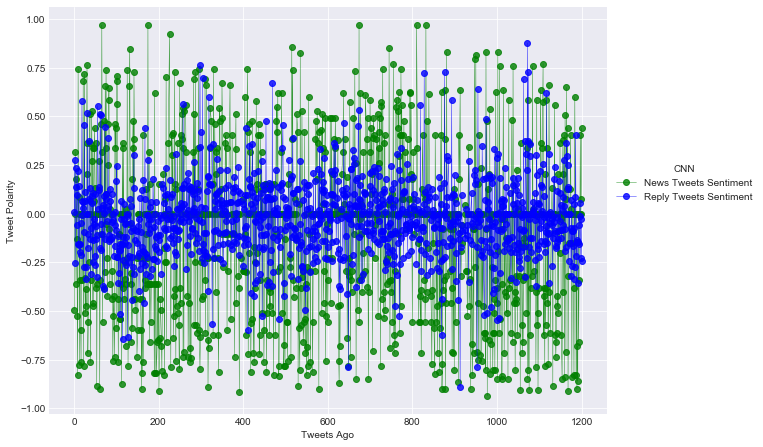

In [62]:
plt.figure(figsize=(10,7.5))
plt.style.use('seaborn-darkgrid')
x_val = cnn_twitter_news_reply_sentiment["News Tweets Ago"]
y_news = cnn_twitter_news_reply_sentiment["News Compound"]
y_reply = cnn_twitter_news_reply_sentiment["Reply Compound"]
plt.plot(x_val, y_news, marker="o", linewidth=0.5,
                 alpha=0.8, color="g", label='News Tweets Sentiment')
plt.plot(x_val, y_reply, marker="o", linewidth=0.5,
                 alpha=0.8, color="b", label='Reply Tweets Sentiment')
lgd = plt.legend(title="CNN",loc='lower left', bbox_to_anchor=(1, 0.5))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.title("CNN tweet sentiment: News vs Reply")
plt.savefig(f"Result/CNN_twitter_news_reply_sentiment.png",bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

In [9]:
cnn_youtube = pd.read_csv("Resource/CNN_data.csv")
cnn_youtube = cnn_youtube.rename(columns = {"Unnamed: 0": "Video Ago"})
cnn_youtube.head()

,Video Ago,Channel Name,Comment Count,Comment Date,Comment Text,Comment Time,Compound Score,Dislike Count,Favorite Count,Likes Count,Negative Score,Neutral Score,Positive Score,Video Date,Video ID,Video Time,Video Title,Views Count
0,0,CNN,44,2018-04-15,"Absolute bullshit , there is strong evidence i...",09:27:52,-0.8872,7,0,10,0.319,0.572,0.108,2018-04-15,CgkI3Ub2lZw,09:23:44,Suspected chemical attack survivors speak to CNN,44
1,1,CNN,44,2018-04-15,🚫 CNN IS FAKE NEWS 🚫,09:27:40,-0.4767,7,0,10,0.508,0.492,0.000,2018-04-15,CgkI3Ub2lZw,09:23:44,Suspected chemical attack survivors speak to CNN,44
2,2,CNN,44,2018-04-15,*N O M O R E N E O C O N W A R S F ...,09:27:36,0.0000,7,0,10,0.000,1.000,0.000,2018-04-15,CgkI3Ub2lZw,09:23:44,Suspected chemical attack survivors speak to CNN,44
3,3,CNN,44,2018-04-15,"Poor People, This is so sad 😞 Sending Prayers ...",09:26:44,-0.7959,7,0,10,0.321,0.679,0.000,2018-04-15,CgkI3Ub2lZw,09:23:44,Suspected chemical attack survivors speak to CNN,44
4,4,CNN,44,2018-04-15,I love how Russia was bluffing they didn’t do ...,09:25:57,0.5267,7,0,10,0.135,0.602,0.263,2018-04-15,CgkI3Ub2lZw,09:23:44,Suspected chemical attack survivors speak to CNN,44


In [10]:
cnn_youtube_compound = cnn_youtube.groupby(['Video Title'])['Compound Score'].mean()
cnn_youtube_negative = cnn_youtube.groupby(['Video Title'])['Negative Score'].mean()
cnn_youtube_neutral = cnn_youtube.groupby(['Video Title'])['Neutral Score'].mean()
cnn_youtube_positive = cnn_youtube.groupby(['Video Title'])['Positive Score'].mean()
cnn_youtube_sentiment = pd.DataFrame({"Reply Compound": cnn_youtube_compound,
                                    "Reply Positive": cnn_youtube_positive,
                                    "Reply Neutral": cnn_youtube_neutral,
                                    "Reply Negative": cnn_youtube_negative,
    
                                    })
cnn_youtube_sentiment = cnn_youtube_sentiment.reset_index()
cnn_youtube_sentiment.head()

,Video Title,Reply Compound,Reply Negative,Reply Neutral,Reply Positive
0,'Exploding' package designed to scare thieves,-0.291533,0.175370,0.737000,0.087590
1,'Get Out' director: My fear has become my power,-0.312647,0.224773,0.673987,0.101213
2,'I'm upset of how my child views race',-0.090983,0.130978,0.757087,0.111967
3,'Lady Bird's' Greta Gerwig started directing i...,-0.020800,0.182767,0.694600,0.122633
4,'My people die young in this country' speech g...,-0.156860,0.175313,0.672302,0.152417


In [11]:
title_sentiment = []
for index, row in cnn_youtube_sentiment.iterrows():
    results = analyzer.polarity_scores(row["Video Title"])    
    compound = results["compound"]
    pos = results["pos"]
    neu = results["neu"]
    neg = results["neg"]
    title_sentiment.append({"Video Title": row["Video Title"],
                           "Title Compound": compound,
                           "Title Positive": pos,
                           "Title Neutral": neu,
                           "Title Negative": neg})
title_sentiment_pd = pd.DataFrame.from_dict(title_sentiment)
title_sentiment_pd = title_sentiment_pd[["Video Title",
                           "Title Compound",
                           "Title Positive",
                           "Title Neutral",
                           "Title Negative"]]
title_sentiment_pd.head()
# export sentiments dataframe to csv
#title_sentiment_pd.to_csv("Reply_Youtube_CNN.csv")

,Video Title,Title Compound,Title Positive,Title Neutral,Title Negative
0,'Exploding' package designed to scare thieves,-0.7579,0.0,0.381,0.619
1,'Get Out' director: My fear has become my power,-0.4939,0.0,0.714,0.286
2,'I'm upset of how my child views race',-0.3818,0.0,0.729,0.271
3,'Lady Bird's' Greta Gerwig started directing i...,0.0000,0.0,1.000,0.000
4,'My people die young in this country' speech g...,-0.5994,0.0,0.672,0.328


In [12]:
cnn_youtube_news_reply_sentiment = cnn_youtube_sentiment.merge(title_sentiment_pd,on='Video Title',how='inner')
cnn_youtube_news_reply_sentiment.head()

,Video Title,Reply Compound,Reply Negative,Reply Neutral,Reply Positive,Title Compound,Title Positive,Title Neutral,Title Negative
0,'Exploding' package designed to scare thieves,-0.291533,0.175370,0.737000,0.087590,-0.7579,0.0,0.381,0.619
1,'Get Out' director: My fear has become my power,-0.312647,0.224773,0.673987,0.101213,-0.4939,0.0,0.714,0.286
2,'I'm upset of how my child views race',-0.090983,0.130978,0.757087,0.111967,-0.3818,0.0,0.729,0.271
3,'Lady Bird's' Greta Gerwig started directing i...,-0.020800,0.182767,0.694600,0.122633,0.0000,0.0,1.000,0.000
4,'My people die young in this country' speech g...,-0.156860,0.175313,0.672302,0.152417,-0.5994,0.0,0.672,0.328


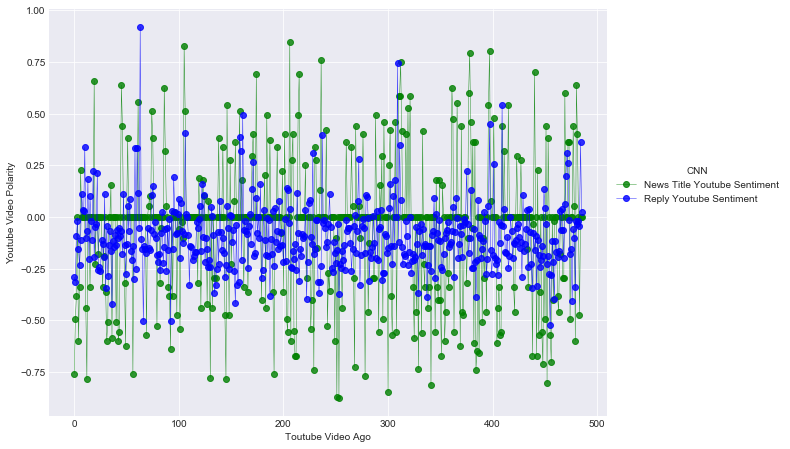

In [22]:
plt.figure(figsize=(10,7.5))
plt.style.use('seaborn-darkgrid')
x_val = np.arange(len(cnn_youtube_news_reply_sentiment["Video Title"]))
y_news = cnn_youtube_news_reply_sentiment["Title Compound"]
y_reply = cnn_youtube_news_reply_sentiment["Reply Compound"]
plt.plot(x_val, y_news, marker="o", linewidth=0.5,
                 alpha=0.8, color="g", label='News Title Youtube Sentiment')
plt.plot(x_val, y_reply, marker="o", linewidth=0.5,
                 alpha=0.8, color="b", label='Reply Youtube Sentiment')
lgd = plt.legend(title="CNN",loc='lower left', bbox_to_anchor=(1, 0.5))
plt.ylabel("Youtube Video Polarity")
plt.xlabel("Toutube Video Ago")
plt.savefig(f"Result/CNN_youtube_news_reply_sentiment.png",bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

In [14]:
cnn_twitter_news_reply_sentiment.head()

,News Account,Screen Name,News Text,News Created Date,News id,News Account id,Retweet Count,Like Count,Followers Count,News Compound,News Positive,News Neutral,News Negative,News Tweets Ago,News Created Date Simplified,Reply Compound,Reply Negative,Reply Neutral,Reply Positive
0,@CNN,CNN,People in Boston came together on Sunday to ru...,Mon Apr 16 00:18:05 +0000 2018,985673650232840192,759251,89,385,40152913,-0.4939,0.000,0.897,0.103,1,Apr 16,0.008517,0.0625,0.689167,0.248333
1,@CNN,CNN,Here's how to build a bamboo theater in Hong K...,Mon Apr 16 00:07:14 +0000 2018,985670920302989312,759251,39,119,40152913,0.0000,0.000,1.000,0.000,2,Apr 16,0.273375,0.0000,0.845500,0.154500
2,@CNN,CNN,New York gubernatorial candidate Cynthia Nixon...,Mon Apr 16 00:00:13 +0000 2018,985669153121013761,759251,46,176,40152913,0.3182,0.126,0.874,0.000,3,Apr 16,-0.255900,0.2170,0.783000,0.000000
3,@CNN,CNN,"French President Emmanuel Macron says he ""conv...",Sun Apr 15 23:30:04 +0000 2018,985661564123516930,759251,57,117,40152913,-0.3612,0.000,0.872,0.128,5,Apr 15,0.236540,0.0576,0.705200,0.237200
4,@CNN,CNN,"""Ten days ago, President Trump said the USA's ...",Sun Apr 15 23:24:06 +0000 2018,985660063128932356,759251,129,268,40152913,0.1779,0.085,0.865,0.050,6,Apr 15,0.134611,0.0775,0.811611,0.110889


In [15]:
cnn_twitter_news_reply_sentiment.iloc[0,3][4:10]

'Apr 16'

In [16]:
news_created_date_simplified = []
for date in cnn_twitter_news_reply_sentiment['News Created Date'].values:
    news_created_date_simplified.append(date[4:10])  

In [17]:
cnn_twitter_news_reply_sentiment['News Created Date'].values

array(['Mon Apr 16 00:18:05 +0000 2018', 'Mon Apr 16 00:07:14 +0000 2018',
       'Mon Apr 16 00:00:13 +0000 2018', ...,
       'Sat Apr 07 23:00:17 +0000 2018', 'Sat Apr 07 22:45:07 +0000 2018',
       'Sat Apr 07 22:30:15 +0000 2018'], dtype=object)

In [18]:
cnn_twitter_news_reply_sentiment["News Created Date Simplified"] = pd.Series(news_created_date_simplified, index=cnn_twitter_news_reply_sentiment.index)

In [19]:
cnn_twitter_news_reply_sentiment

,News Account,Screen Name,News Text,News Created Date,News id,News Account id,Retweet Count,Like Count,Followers Count,News Compound,News Positive,News Neutral,News Negative,News Tweets Ago,News Created Date Simplified,Reply Compound,Reply Negative,Reply Neutral,Reply Positive
0,@CNN,CNN,People in Boston came together on Sunday to ru...,Mon Apr 16 00:18:05 +0000 2018,985673650232840192,759251,89,385,40152913,-0.4939,0.000,0.897,0.103,1,Apr 16,0.008517,0.062500,0.689167,0.248333
1,@CNN,CNN,Here's how to build a bamboo theater in Hong K...,Mon Apr 16 00:07:14 +0000 2018,985670920302989312,759251,39,119,40152913,0.0000,0.000,1.000,0.000,2,Apr 16,0.273375,0.000000,0.845500,0.154500
2,@CNN,CNN,New York gubernatorial candidate Cynthia Nixon...,Mon Apr 16 00:00:13 +0000 2018,985669153121013761,759251,46,176,40152913,0.3182,0.126,0.874,0.000,3,Apr 16,-0.255900,0.217000,0.783000,0.000000
3,@CNN,CNN,"French President Emmanuel Macron says he ""conv...",Sun Apr 15 23:30:04 +0000 2018,985661564123516930,759251,57,117,40152913,-0.3612,0.000,0.872,0.128,5,Apr 15,0.236540,0.057600,0.705200,0.237200
4,@CNN,CNN,"""Ten days ago, President Trump said the USA's ...",Sun Apr 15 23:24:06 +0000 2018,985660063128932356,759251,129,268,40152913,0.1779,0.085,0.865,0.050,6,Apr 15,0.134611,0.077500,0.811611,0.110889
5,@CNN,CNN,Democrats running this year cautiously back Pr...,Sun Apr 15 23:00:02 +0000 2018,985654007128580096,759251,30,102,40152913,-0.1280,0.000,0.897,0.103,7,Apr 15,-0.059560,0.089800,0.841600,0.068600
6,@CNN,CNN,Police find animal waste in counterfeit makeup...,Sun Apr 15 22:45:05 +0000 2018,985650246620413953,759251,135,212,40152913,-0.5255,0.000,0.761,0.239,8,Apr 15,0.094656,0.051556,0.806889,0.141556
7,@CNN,CNN,To commemorate the 5th anniversary of the Bost...,Sun Apr 15 22:30:03 +0000 2018,985646462259335168,759251,261,1229,40152913,-0.8316,0.000,0.822,0.178,9,Apr 15,0.218800,0.000000,0.817000,0.183000
8,@CNN,CNN,Two polls show Trump approval below 40% and De...,Sun Apr 15 22:15:09 +0000 2018,985642711821758464,759251,334,1308,40152913,0.7430,0.344,0.656,0.000,10,Apr 15,-0.157227,0.136000,0.819955,0.044091
9,@CNN,CNN,President Trump unloads Twitter fusillade as f...,Sun Apr 15 22:00:04 +0000 2018,985638916228304899,759251,70,206,40152913,0.0000,0.000,1.000,0.000,11,Apr 15,-0.159833,0.077222,0.883889,0.038778


In [64]:
cnn_news_twitter_compound_by_date = cnn_twitter_news_reply_sentiment.groupby(['News Created Date Simplified'])['News Compound'].mean()
cnn_news_twitter_positive_by_date = cnn_twitter_news_reply_sentiment.groupby(['News Created Date Simplified'])['News Positive'].mean()
cnn_news_twitter_neutral_by_date = cnn_twitter_news_reply_sentiment.groupby(['News Created Date Simplified'])['News Neutral'].mean()
cnn_news_twitter_negative_by_date = cnn_twitter_news_reply_sentiment.groupby(['News Created Date Simplified'])['News Negative'].mean()
cnn_reply_twitter_compound_by_date = cnn_twitter_news_reply_sentiment.groupby(['News Created Date Simplified'])['Reply Compound'].mean()
cnn_reply_twitter_positive_by_date = cnn_twitter_news_reply_sentiment.groupby(['News Created Date Simplified'])['Reply Positive'].mean()
cnn_reply_twitter_neutral_by_date = cnn_twitter_news_reply_sentiment.groupby(['News Created Date Simplified'])['Reply Neutral'].mean()
cnn_reply_twitter_negative_by_date = cnn_twitter_news_reply_sentiment.groupby(['News Created Date Simplified'])['Reply Negative'].mean()

cnn_twitter_news_reply_sentiment_by_date = pd.DataFrame({
                                    "Tweet News Compound": cnn_news_twitter_compound_by_date,
                                    "Tweet News Positive": cnn_news_twitter_positive_by_date,
                                    "Tweet News Neutral": cnn_news_twitter_neutral_by_date,
                                    "Tweet News Negative": cnn_news_twitter_negative_by_date,
                                    "Tweet Reply Compound": cnn_reply_twitter_compound_by_date,
                                    "Tweet Reply Positive": cnn_reply_twitter_positive_by_date,
                                    "Tweet Reply Neutral": cnn_reply_twitter_neutral_by_date,
                                    "Tweet Reply Negative": cnn_reply_twitter_negative_by_date
    
                                    })
cnn_twitter_news_reply_sentiment_by_date = cnn_twitter_news_reply_sentiment_by_date.reset_index()
cnn_twitter_news_reply_sentiment_by_date

,News Created Date Simplified,Tweet News Compound,Tweet News Negative,Tweet News Neutral,Tweet News Positive,Tweet Reply Compound,Tweet Reply Negative,Tweet Reply Neutral,Tweet Reply Positive
0,Apr 07,-0.104600,0.092333,0.861667,0.046000,-0.130049,0.140583,0.795878,0.063549
1,Apr 08,-0.158626,0.117808,0.825548,0.056699,-0.031622,0.117081,0.784283,0.098628
2,Apr 09,-0.185886,0.110494,0.836041,0.053459,-0.014699,0.105326,0.794063,0.100612
3,Apr 10,-0.044124,0.074821,0.862771,0.062385,-0.035396,0.101707,0.801571,0.096729
4,Apr 11,-0.055012,0.071916,0.873078,0.055032,-0.007702,0.100715,0.795950,0.103336
5,Apr 12,-0.121426,0.079580,0.867987,0.052433,-0.016203,0.100856,0.798595,0.100552
6,Apr 13,-0.047607,0.078296,0.860920,0.060792,0.016515,0.093574,0.793386,0.113034
7,Apr 14,-0.176359,0.122699,0.819659,0.057675,-0.096226,0.119589,0.797435,0.082989
8,Apr 15,-0.034083,0.086439,0.846354,0.067232,0.007721,0.101189,0.785127,0.113672
9,Apr 16,-0.058567,0.034333,0.923667,0.042000,0.008664,0.093167,0.772556,0.134278


TypeError: 'str' object is not callable

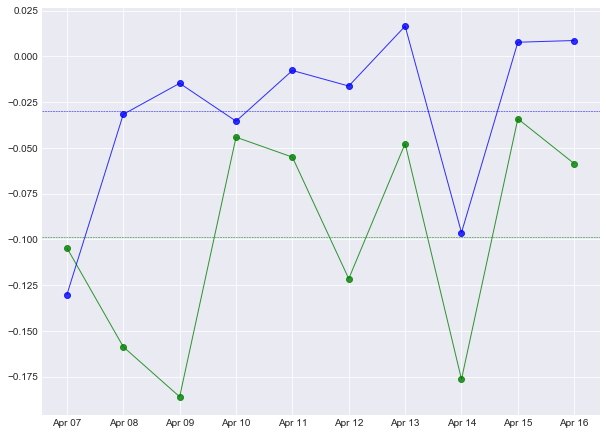

In [65]:
plt.figure(figsize=(10,7.5))
plt.style.use('seaborn-darkgrid')
x_val = cnn_twitter_news_reply_sentiment_by_date["News Created Date Simplified"]
y_news = cnn_twitter_news_reply_sentiment_by_date["Tweet News Compound"]
y_reply = cnn_twitter_news_reply_sentiment_by_date["Tweet Reply Compound"]
plt.plot(x_val, y_news, marker="o", linewidth=1,
                 alpha=0.8, color="g", label='News Tweets Sentiment')
plt.plot(x_val, y_reply, marker="o", linewidth=1,
                 alpha=0.8, color="b", label='Reply Tweets Sentiment')
plt.axhline(y=cnn_twitter_news_reply_sentiment_by_date['Tweet News Compound'].mean(), color='g', linestyle='dashed',linewidth=0.5,label='News Tweets Sentiment Average')
plt.axhline(y=cnn_twitter_news_reply_sentiment_by_date['Tweet Reply Compound'].mean(), color='b', linestyle='dashed',linewidth=0.5,label='Reply Tweets Sentiment Average')
plt.title("CNN tweet sentiment: News vs Reply")
lgd = plt.legend(title="CNN",loc='lower left', bbox_to_anchor=(1, 0.5))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Created Date")
plt.savefig(f"Result/CNN_twitter_news_reply_sentiment_by_date.png",bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

In [78]:
cnn_youtube_news_reply_sentiment.head()

,Video Title,Reply Compound,Reply Negative,Reply Neutral,Reply Positive,Title Compound,Title Positive,Title Neutral,Title Negative
0,2-year-old: Michelle Obama is a queen,0.337164,0.07634,0.62949,0.29419,0.0000,0.0,1.000,0.000
1,67-year-old Jane Seymour opens up about Playbo...,0.098812,0.10345,0.73268,0.16389,-0.3400,0.0,0.745,0.255
2,A lynching memorial remembers the forgotten,-0.050919,0.13624,0.72207,0.13169,-0.2263,0.0,0.678,0.322
3,Acosta presses Sanders on Russia 'toughness',-0.243228,0.19125,0.72774,0.08100,0.0000,0.0,1.000,0.000
4,Advocacy groups say YouTube is collecting kids...,-0.112855,0.11627,0.81194,0.07183,0.0000,0.0,1.000,0.000


In [32]:
video_date = pd.DataFrame({"Video Title":pd.Series(cnn_youtube['Video Title'].values, index=cnn_youtube.index),
                          "Video Date":pd.Series(cnn_youtube['Video Date'].values, index=cnn_youtube.index)
                          })
video_date = video_date.drop_duplicates()

In [34]:
cnn_youtube_news_reply_sentiment_by_date = cnn_youtube_news_reply_sentiment.merge(video_date,on='Video Title',how='left')
cnn_youtube_news_reply_sentiment_by_date.head()

,Video Title,Reply Compound,Reply Negative,Reply Neutral,Reply Positive,Title Compound,Title Positive,Title Neutral,Title Negative,Video Date
0,'Exploding' package designed to scare thieves,-0.291533,0.175370,0.737000,0.087590,-0.7579,0.0,0.381,0.619,2017-12-23
1,'Get Out' director: My fear has become my power,-0.312647,0.224773,0.673987,0.101213,-0.4939,0.0,0.714,0.286,2018-03-04
2,'I'm upset of how my child views race',-0.090983,0.130978,0.757087,0.111967,-0.3818,0.0,0.729,0.271,2010-05-20
3,'Lady Bird's' Greta Gerwig started directing i...,-0.020800,0.182767,0.694600,0.122633,0.0000,0.0,1.000,0.000,2018-03-04
4,'My people die young in this country' speech g...,-0.156860,0.175313,0.672302,0.152417,-0.5994,0.0,0.672,0.328,2016-01-25


In [36]:
cnn_youtube_title_compound = cnn_youtube_news_reply_sentiment_by_date.groupby(['Video Date'])['Title Compound'].mean()
cnn_youtube_title_negative = cnn_youtube_news_reply_sentiment_by_date.groupby(['Video Date'])['Title Negative'].mean()
cnn_youtube_title_neutral = cnn_youtube_news_reply_sentiment_by_date.groupby(['Video Date'])['Title Neutral'].mean()
cnn_youtube_title_positive = cnn_youtube_news_reply_sentiment_by_date.groupby(['Video Date'])['Title Positive'].mean()
cnn_youtube_reply_compound = cnn_youtube_news_reply_sentiment_by_date.groupby(['Video Date'])['Reply Compound'].mean()
cnn_youtube_reply_negative = cnn_youtube_news_reply_sentiment_by_date.groupby(['Video Date'])['Reply Negative'].mean()
cnn_youtube_reply_neutral = cnn_youtube_news_reply_sentiment_by_date.groupby(['Video Date'])['Reply Neutral'].mean()
cnn_youtube_reply_positive = cnn_youtube_news_reply_sentiment_by_date.groupby(['Video Date'])['Reply Positive'].mean()
cnn_youtube_sentiment_by_date = pd.DataFrame({
                                    "Youtube Title Compound": cnn_youtube_title_compound,
                                    "Youtube Title Positive": cnn_youtube_title_positive,
                                    "Youtube Title Neutral": cnn_youtube_title_neutral,
                                    "Youtube Title Negative": cnn_youtube_title_negative,
                                    "Youtube Reply Compound": cnn_youtube_reply_compound,
                                    "Youtube Reply Positive": cnn_youtube_reply_positive,
                                    "Youtube Reply Neutral": cnn_youtube_reply_neutral,
                                    "Youtube Reply Negative": cnn_youtube_reply_negative,
    
                                    })
cnn_youtube_sentiment_by_date = cnn_youtube_sentiment_by_date.reset_index()


,Video Date,Youtube Reply Compound,Youtube Reply Negative,Youtube Reply Neutral,Youtube Reply Positive,Youtube Title Compound,Youtube Title Negative,Youtube Title Neutral,Youtube Title Positive
0,2010-03-01,0.744300,0.055500,0.617000,0.327500,0.000000,0.000000,1.000000,0.000000
1,2010-05-19,-0.032470,0.175330,0.698270,0.126400,-0.102700,0.189000,0.811000,0.000000
2,2010-05-20,-0.090983,0.130978,0.757087,0.111967,-0.381800,0.271000,0.729000,0.000000
3,2010-08-27,-0.055475,0.142060,0.764750,0.093190,0.000000,0.000000,1.000000,0.000000
4,2010-11-22,0.918200,0.000000,0.776000,0.224000,0.000000,0.000000,1.000000,0.000000
5,2010-12-24,0.113472,0.089230,0.795280,0.115540,0.557400,0.000000,0.526000,0.474000
6,2011-04-15,-0.107785,0.201040,0.680040,0.118860,0.000000,0.000000,1.000000,0.000000
7,2011-07-01,0.331520,0.000000,0.748400,0.251600,0.000000,0.000000,1.000000,0.000000
8,2011-09-12,-0.025887,0.158540,0.692980,0.148480,0.000000,0.000000,1.000000,0.000000
9,2011-10-04,-0.117948,0.179290,0.708550,0.112130,-0.401900,0.351000,0.649000,0.000000


In [37]:
cnn_youtube_sentiment_by_date.set_value(279,"Video Date","Apr 07")
cnn_youtube_sentiment_by_date.set_value(280,"Video Date","Apr 08")
cnn_youtube_sentiment_by_date.set_value(281,"Video Date","Apr 09")
cnn_youtube_sentiment_by_date.set_value(282,"Video Date","Apr 10")
cnn_youtube_sentiment_by_date.set_value(283,"Video Date","Apr 11")
cnn_youtube_sentiment_by_date.set_value(284,"Video Date","Apr 12")
cnn_youtube_sentiment_by_date.set_value(285,"Video Date","Apr 13")
cnn_youtube_sentiment_by_date.set_value(286,"Video Date","Apr 14")
cnn_youtube_sentiment_by_date.set_value(287,"Video Date","Apr 15")

/Users/jiemeizhang/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.
/Users/jiemeizhang/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/Users/jiemeizhang/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jiemeizhang/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] o

,Video Date,Youtube Reply Compound,Youtube Reply Negative,Youtube Reply Neutral,Youtube Reply Positive,Youtube Title Compound,Youtube Title Negative,Youtube Title Neutral,Youtube Title Positive
0,2010-03-01,0.744300,0.055500,0.617000,0.327500,0.000000,0.000000,1.000000,0.000000
1,2010-05-19,-0.032470,0.175330,0.698270,0.126400,-0.102700,0.189000,0.811000,0.000000
2,2010-05-20,-0.090983,0.130978,0.757087,0.111967,-0.381800,0.271000,0.729000,0.000000
3,2010-08-27,-0.055475,0.142060,0.764750,0.093190,0.000000,0.000000,1.000000,0.000000
4,2010-11-22,0.918200,0.000000,0.776000,0.224000,0.000000,0.000000,1.000000,0.000000
5,2010-12-24,0.113472,0.089230,0.795280,0.115540,0.557400,0.000000,0.526000,0.474000
6,2011-04-15,-0.107785,0.201040,0.680040,0.118860,0.000000,0.000000,1.000000,0.000000
7,2011-07-01,0.331520,0.000000,0.748400,0.251600,0.000000,0.000000,1.000000,0.000000
8,2011-09-12,-0.025887,0.158540,0.692980,0.148480,0.000000,0.000000,1.000000,0.000000
9,2011-10-04,-0.117948,0.179290,0.708550,0.112130,-0.401900,0.351000,0.649000,0.000000


In [39]:
cnn_youtube_sentiment_by_date = cnn_youtube_sentiment_by_date.set_index('Video Date')
cnn_youtube_sentiment_by_date

,Youtube Reply Compound,Youtube Reply Negative,Youtube Reply Neutral,Youtube Reply Positive,Youtube Title Compound,Youtube Title Negative,Youtube Title Neutral,Youtube Title Positive
Video Date,,,,,,,,
2010-03-01,0.744300,0.055500,0.617000,0.327500,0.000000,0.000000,1.000000,0.000000
2010-05-19,-0.032470,0.175330,0.698270,0.126400,-0.102700,0.189000,0.811000,0.000000
2010-05-20,-0.090983,0.130978,0.757087,0.111967,-0.381800,0.271000,0.729000,0.000000
2010-08-27,-0.055475,0.142060,0.764750,0.093190,0.000000,0.000000,1.000000,0.000000
2010-11-22,0.918200,0.000000,0.776000,0.224000,0.000000,0.000000,1.000000,0.000000
2010-12-24,0.113472,0.089230,0.795280,0.115540,0.557400,0.000000,0.526000,0.474000
2011-04-15,-0.107785,0.201040,0.680040,0.118860,0.000000,0.000000,1.000000,0.000000
2011-07-01,0.331520,0.000000,0.748400,0.251600,0.000000,0.000000,1.000000,0.000000
2011-09-12,-0.025887,0.158540,0.692980,0.148480,0.000000,0.000000,1.000000,0.000000


In [40]:
cnn_twitter_news_reply_sentiment_by_date = cnn_twitter_news_reply_sentiment_by_date.set_index('News Created Date Simplified')
cnn_twitter_news_reply_sentiment_by_date

,Tweet News Compound,Tweet News Negative,Tweet News Neutral,Tweet News Positive,Tweet Reply Compound,Tweet Reply Negative,Tweet Reply Neutral,Tweet Reply Positive
News Created Date Simplified,,,,,,,,
Apr 07,-0.104600,0.092333,0.861667,0.046000,-0.130049,0.140583,0.795878,0.063549
Apr 08,-0.158626,0.117808,0.825548,0.056699,-0.031622,0.117081,0.784283,0.098628
Apr 09,-0.185886,0.110494,0.836041,0.053459,-0.014699,0.105326,0.794063,0.100612
Apr 10,-0.044124,0.074821,0.862771,0.062385,-0.035396,0.101707,0.801571,0.096729
Apr 11,-0.055012,0.071916,0.873078,0.055032,-0.007702,0.100715,0.795950,0.103336
Apr 12,-0.121426,0.079580,0.867987,0.052433,-0.016203,0.100856,0.798595,0.100552
Apr 13,-0.047607,0.078296,0.860920,0.060792,0.016515,0.093574,0.793386,0.113034
Apr 14,-0.176359,0.122699,0.819659,0.057675,-0.096226,0.119589,0.797435,0.082989
Apr 15,-0.034083,0.086439,0.846354,0.067232,0.007721,0.101189,0.785127,0.113672


In [41]:
youtube_tweet_news_reply_sentiment = cnn_twitter_news_reply_sentiment_by_date.merge(cnn_youtube_sentiment_by_date,left_index=True,right_index=True,how='inner')
youtube_tweet_news_reply_sentiment.reset_index(inplace=True)
youtube_tweet_news_reply_sentiment = youtube_tweet_news_reply_sentiment.rename(columns={"index": "News Created Date"})
youtube_tweet_news_reply_sentiment

,News Created Date,Tweet News Compound,Tweet News Negative,Tweet News Neutral,Tweet News Positive,Tweet Reply Compound,Tweet Reply Negative,Tweet Reply Neutral,Tweet Reply Positive,Youtube Reply Compound,Youtube Reply Negative,Youtube Reply Neutral,Youtube Reply Positive,Youtube Title Compound,Youtube Title Negative,Youtube Title Neutral,Youtube Title Positive
0,Apr 07,-0.104600,0.092333,0.861667,0.046000,-0.130049,0.140583,0.795878,0.063549,-0.142375,0.154463,0.742871,0.102667,-0.212457,0.159143,0.840857,0.000000
1,Apr 08,-0.158626,0.117808,0.825548,0.056699,-0.031622,0.117081,0.784283,0.098628,-0.180274,0.166275,0.738778,0.094953,-0.293870,0.217200,0.762300,0.020500
2,Apr 09,-0.185886,0.110494,0.836041,0.053459,-0.014699,0.105326,0.794063,0.100612,-0.223325,0.182611,0.719151,0.094402,-0.203385,0.180538,0.800615,0.018846
3,Apr 10,-0.044124,0.074821,0.862771,0.062385,-0.035396,0.101707,0.801571,0.096729,-0.166727,0.159191,0.747265,0.093558,-0.087800,0.131143,0.804786,0.064071
4,Apr 11,-0.055012,0.071916,0.873078,0.055032,-0.007702,0.100715,0.795950,0.103336,-0.169341,0.160565,0.737954,0.099711,-0.022982,0.091824,0.832706,0.075471
5,Apr 12,-0.121426,0.079580,0.867987,0.052433,-0.016203,0.100856,0.798595,0.100552,-0.165165,0.158929,0.741342,0.099067,-0.193167,0.162400,0.837600,0.000000
6,Apr 13,-0.047607,0.078296,0.860920,0.060792,0.016515,0.093574,0.793386,0.113034,-0.158365,0.161412,0.726918,0.109833,-0.120436,0.135636,0.804909,0.059455
7,Apr 14,-0.176359,0.122699,0.819659,0.057675,-0.096226,0.119589,0.797435,0.082989,-0.219803,0.187332,0.711179,0.100387,0.028978,0.045444,0.872778,0.081778
8,Apr 15,-0.034083,0.086439,0.846354,0.067232,0.007721,0.101189,0.785127,0.113672,-0.060858,0.207417,0.621167,0.171417,-0.612400,0.500000,0.500000,0.000000


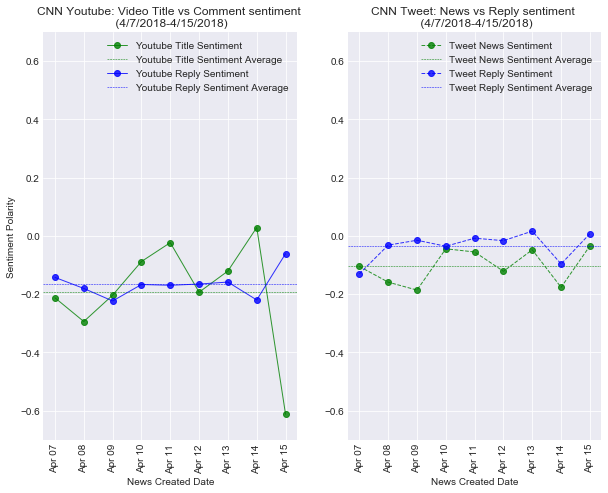

In [66]:
plt.figure(figsize=(10,7.5))
plt.style.use('seaborn-darkgrid')
#plt.title("CNN Youtube vs Twitter: News vs reply sentiment (4/7/2018-4/15/2018)")

x_val = youtube_tweet_news_reply_sentiment["News Created Date"]
y_news_tweet = youtube_tweet_news_reply_sentiment["Tweet News Compound"]
y_reply_tweet = youtube_tweet_news_reply_sentiment["Tweet Reply Compound"]
y_news_youtube = youtube_tweet_news_reply_sentiment["Youtube Title Compound"]
y_reply_youtube = youtube_tweet_news_reply_sentiment["Youtube Reply Compound"]

ax1 = plt.subplot(121)
plt.plot(x_val, y_news_youtube, marker="o", linewidth=1,
                 alpha=0.8, color="g", label='Youtube Title Sentiment')
plt.axhline(y=youtube_tweet_news_reply_sentiment['Youtube Title Compound'].mean(), color='g', linestyle='dashed',linewidth=0.5,label='Youtube Title Sentiment Average')
plt.plot(x_val, y_reply_youtube, marker="o", linewidth=1,
                 alpha=0.8, color="b", label='Youtube Reply Sentiment')
plt.axhline(y=youtube_tweet_news_reply_sentiment['Youtube Reply Compound'].mean(), color='b', linestyle='dashed',linewidth=0.5,label='Youtube Reply Sentiment Average')
plt.ylim(-0.7, 0.7)
plt.legend(loc='best')
plt.ylabel("Sentiment Polarity")
plt.xlabel("News Created Date")
plt.xticks(rotation='vertical')
ax1.set_title("CNN Youtube: Video Title vs Comment sentiment \n (4/7/2018-4/15/2018)")

ax2 = plt.subplot(122)
plt.plot(x_val, y_news_tweet, marker="o", linewidth=1,linestyle='dashed',
                 alpha=0.8, color="g", label='Tweet News Sentiment')
plt.axhline(y=youtube_tweet_news_reply_sentiment['Tweet News Compound'].mean(), color='g', linestyle='dashed',linewidth=0.5,label='Tweet News Sentiment Average')
plt.plot(x_val, y_reply_tweet, marker="o", linewidth=1,linestyle='dashed',
                 alpha=0.8, color="b", label='Tweet Reply Sentiment')
plt.axhline(y=youtube_tweet_news_reply_sentiment['Tweet Reply Compound'].mean(), color='b', linestyle='dashed',linewidth=0.5,label='Tweet Reply Sentiment Average')
plt.ylim(-0.7, 0.7)
plt.legend(loc='best')
plt.xlabel("News Created Date")
plt.xticks(rotation='vertical')
ax2.set_title("CNN Tweet: News vs Reply sentiment \n (4/7/2018-4/15/2018)")

plt.savefig(f"Result/CNN_youtube_tweet_news_reply_sentiment_by_date.png")
plt.show()
